In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(12345)

In [2]:
def load_data():
    random.seed()
    iris = datasets.load_iris()
    return iris.data

In [3]:
def distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [4]:
def assign_labels(X, centers):
    Dist=[[distance(x, c) for c in centers] for x in X]
    labels= np.argmin(Dist, axis=1)
    return labels

In [5]:
def calculate_centers(X, labels):
    newcenter = np.array([np.mean(X[labels == c], axis=0) for c in range(len(X))])
    return newcenter

In [6]:
def test_convergence(old_centers, new_centers):
    iter = 100
    return np.all(old_centers - new_centers )<iter if old_centers.shape[0] == new_centers.shape[0] else False 

In [7]:
def evaluate_performance(X, labels, centers):
    size=len(X)
    return np.mean([distance(X[i], centers[labels[i]]) for i in range(size)])

In [8]:
def k_means(X, K):
    old_centers = X[np.random.choice(X.shape[0], K)]
    labels = assign_labels(X, old_centers)
    new_centers = calculate_centers(X, labels)
    while not test_convergence(new_centers, old_centers): 
        old_centers = X[np.random.choice(X.shape[0], K)]
        labels = assign_labels(X, old_centers)
        new_centers =old_centers
    return new_centers, labels

In [9]:
def mse():
    X = load_data()
    error= []
    clusters=range(2,10)
    for k in clusters:
        centers, labels = k_means(X, k)
        error.append(evaluate_performance(X, labels, centers))
    plt.plot(clusters,error)
    plt.title("Mean Square Error Demonstartion:")
    plt.xlabel('Number of Clusters')
    plt.ylabel('Error')
    plt.show()

In [10]:
def elbow_method():
    X = load_data()
    cost=[]
    clusters=range(2,10)
    for k in clusters:
        centers, labels = k_means(X, k)
        cost.append(np.sqrt(np.sum((X[k] - centers[labels[k]])**2)))
    plt.plot(clusters,cost)
    plt.title('Elbow Method Demonstration')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cost')
    plt.show()

In [11]:
X= load_data()
k_means(X,4)

C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


(array([[ 6.6,  2.9,  4.6,  1.3],
        [ 5.8,  2.7,  4.1,  1. ],
        [ 6. ,  3.4,  4.5,  1.6],
        [ 5.3,  3.7,  1.5,  0.2]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0,
        1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2,
        2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2], dtype=int64))

C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


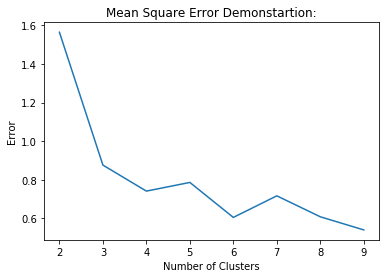

In [12]:
mse()

C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Haftish\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


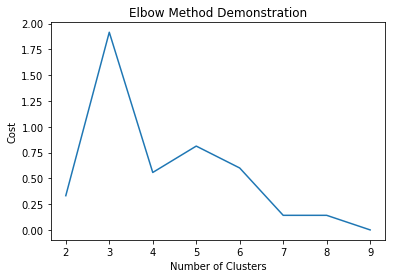

In [17]:
elbow_method()